# Random Forest Classifier on Large Sample:

In [1]:
# First thing first - bring necessary modules in
%matplotlib inline
# a utility project level module for
# loading samples and plotting data
import project_utils as pu
# a utility project level module
# for classification
import model_utils as mu
# numpy and pandas
import numpy as np
import pandas as pd
# plots
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import numpy as np
import pandas as pd
import datetime as dt
import project_utils as pu
import model_utils as mu
from sklearn.ensemble import RandomForestClassifier

## Load Sample:

In [2]:
df_50 = pu.train_data(frac_pos=0.5)

In [3]:
ratio, num_pos, num_neg = pu.pos_neg_ratio(df_50)
print (ratio, num_pos, num_neg)

1.0 6865066 6865066


In [4]:
sample_df = df_50.sample(frac=0.10)

In [5]:
ratio, num_pos, num_neg = pu.pos_neg_ratio(sample_df)
print (ratio, num_pos, num_neg)

1.00092248503 686823 686190


In [6]:
import sys
XS = sample_df[pu.x_columns].values
yS = (sample_df.click > 0).values
print(XS.shape)
XS.nbytes / 1024 /1024

(1373013, 22)


230.45567321777344

In [7]:
# Workout X and y for different samples
X50 = sample_df[pu.x_columns].values
y50 = (sample_df.click > 0).values

In [8]:
# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(sample_df[pu.x_columns].values, 
                                              (sample_df.click > 0).values, random_state=5)

## RFC50 with do_classify:

In [9]:
clf_rfc_50, Xtrain_rfc_50, ytrain_rfc_50, Xtest_rfc_50, ytest_rfc_50  = mu.do_classify(
                                                           RandomForestClassifier(oob_score=True, n_jobs=8), 
                                                           {"n_estimators": [120, 150, 180, 200],
                                                            "min_samples_leaf": [20, 50, 80]},
                                                           sample_df, pu.x_columns, 'click', 0)

BEST PARAMS {'n_estimators': 150, 'min_samples_leaf': 20}
Accuracy on training data: 0.70
Accuracy on test data:     0.68


## RFC50 Accuracy Score:

In [10]:
print("Accuracy Score ytest: %f" % accuracy_score(clf_rfc_50.predict(Xtest_rfc_50), ytest_rfc_50))
print("Accuracy Score ytest: %f" % accuracy_score(clf_rfc_50.predict(X50), y50))

Accuracy Score ytest: 0.683692
Accuracy Score ytest: 0.694862


## RFC50 Confusion Matrix:

In [11]:
print(confusion_matrix(ytest_rfc_50, clf_rfc_50.predict(Xtest_rfc_50)))

[[ 83630  53030]
 [ 33829 104114]]


In [12]:
print(confusion_matrix(y50, clf_rfc_50.predict(X50)))

[[427149 259041]
 [159917 526906]]


## RFC50 Data Projection:

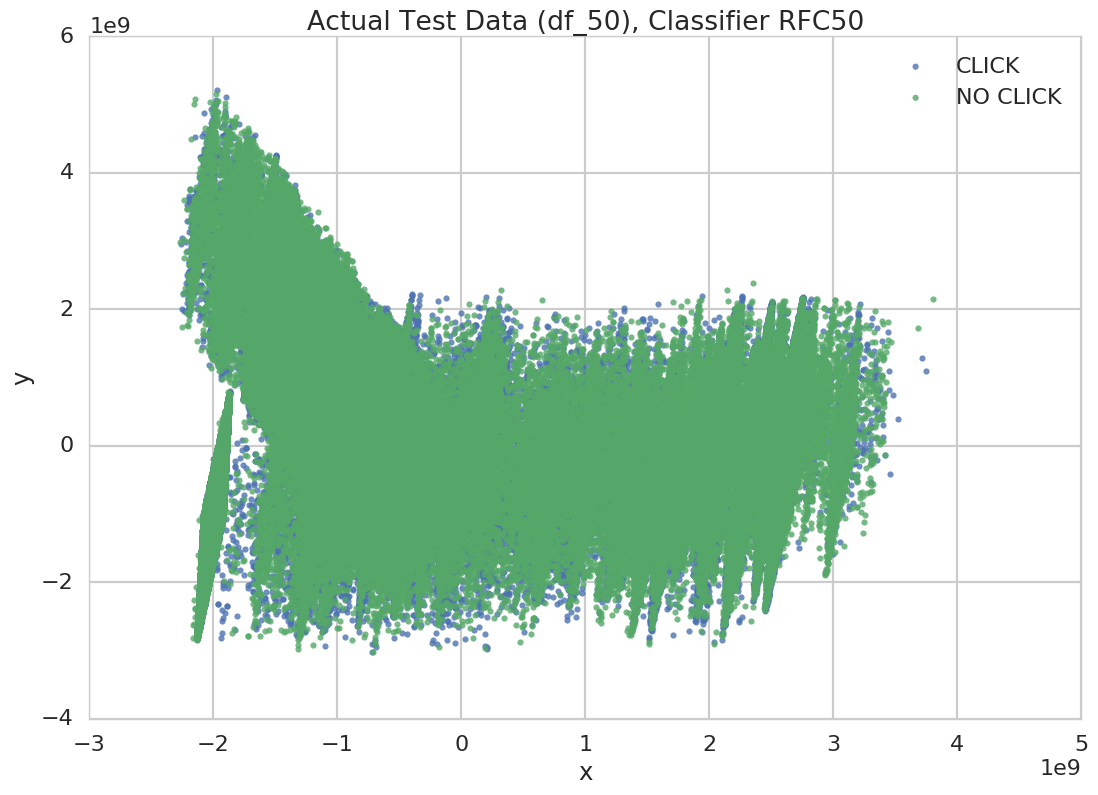

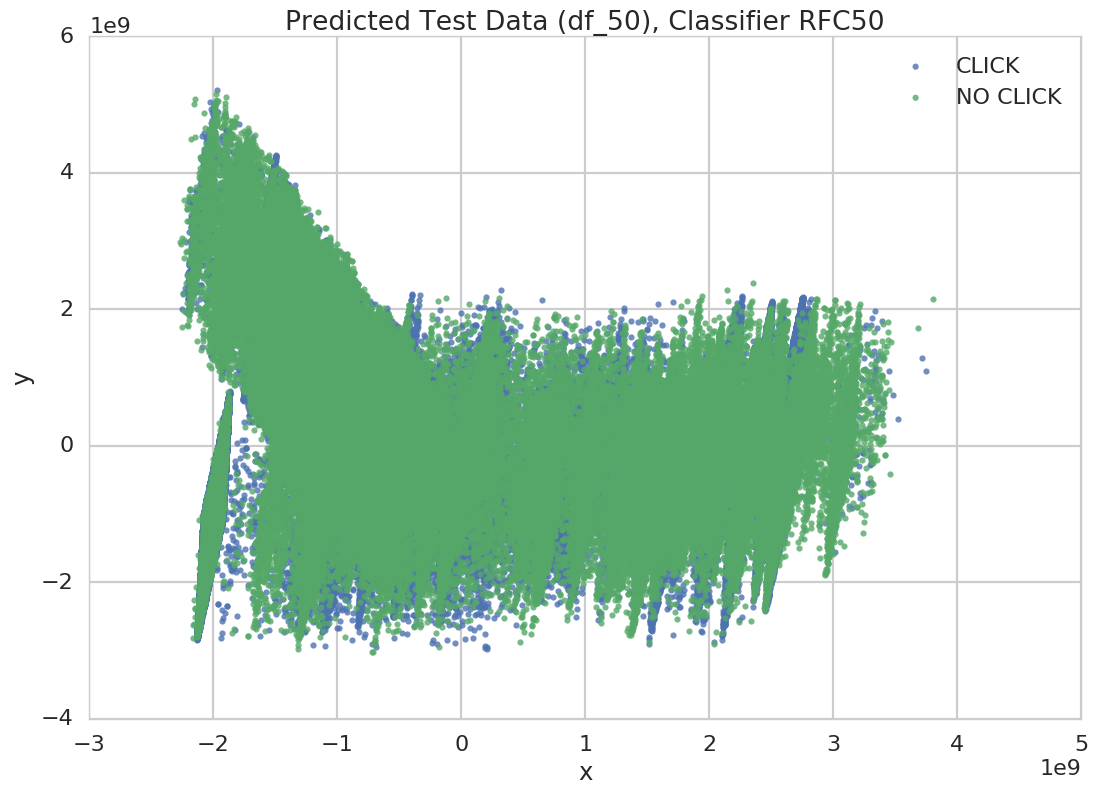

In [13]:
pu.plot_distribution(Xtest, ytest, clf_rfc_50, predicted=False, title="Actual Test Data (df_50), Classifier RFC50")
pu.plot_distribution(Xtest, ytest, clf_rfc_50, predicted=True, title="Predicted Test Data (df_50), Classifier RFC50")

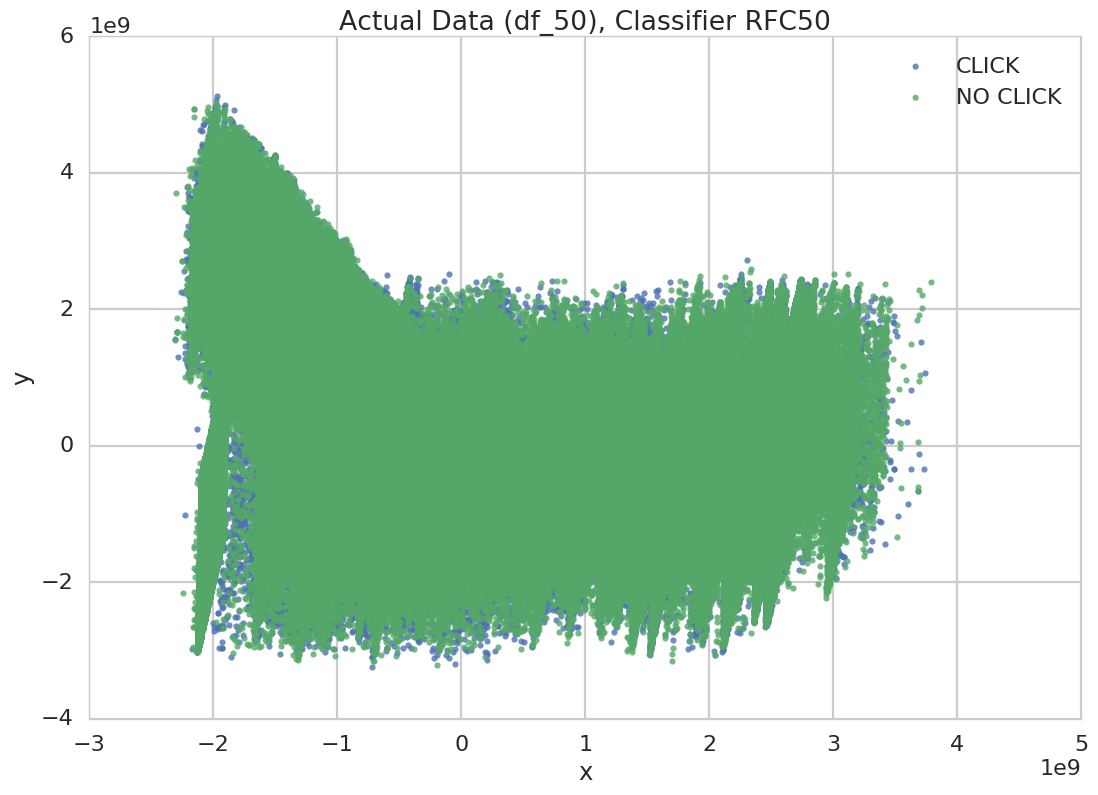

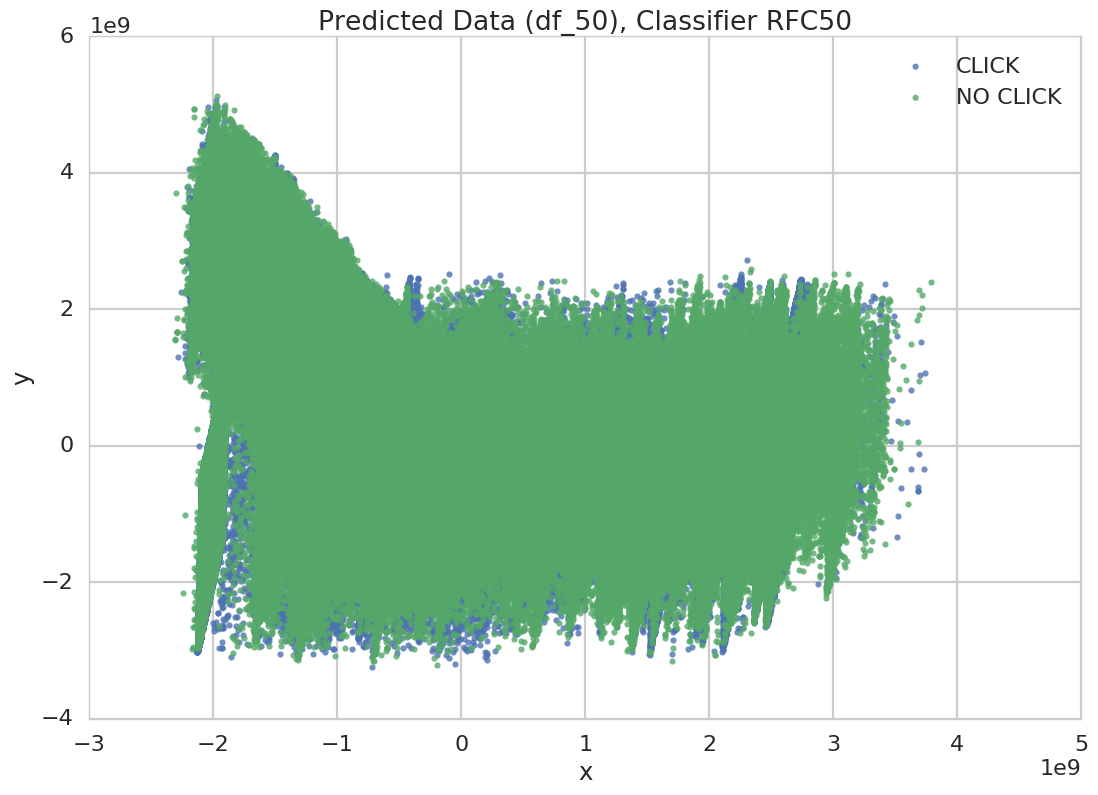

In [14]:
pu.plot_distribution(X50, y50, clf_rfc_50, predicted=False, title="Actual Data (df_50), Classifier RFC50")
pu.plot_distribution(X50, y50, clf_rfc_50, predicted=True, title="Predicted Data (df_50), Classifier RFC50")

## RFC50 Calibration Curve:

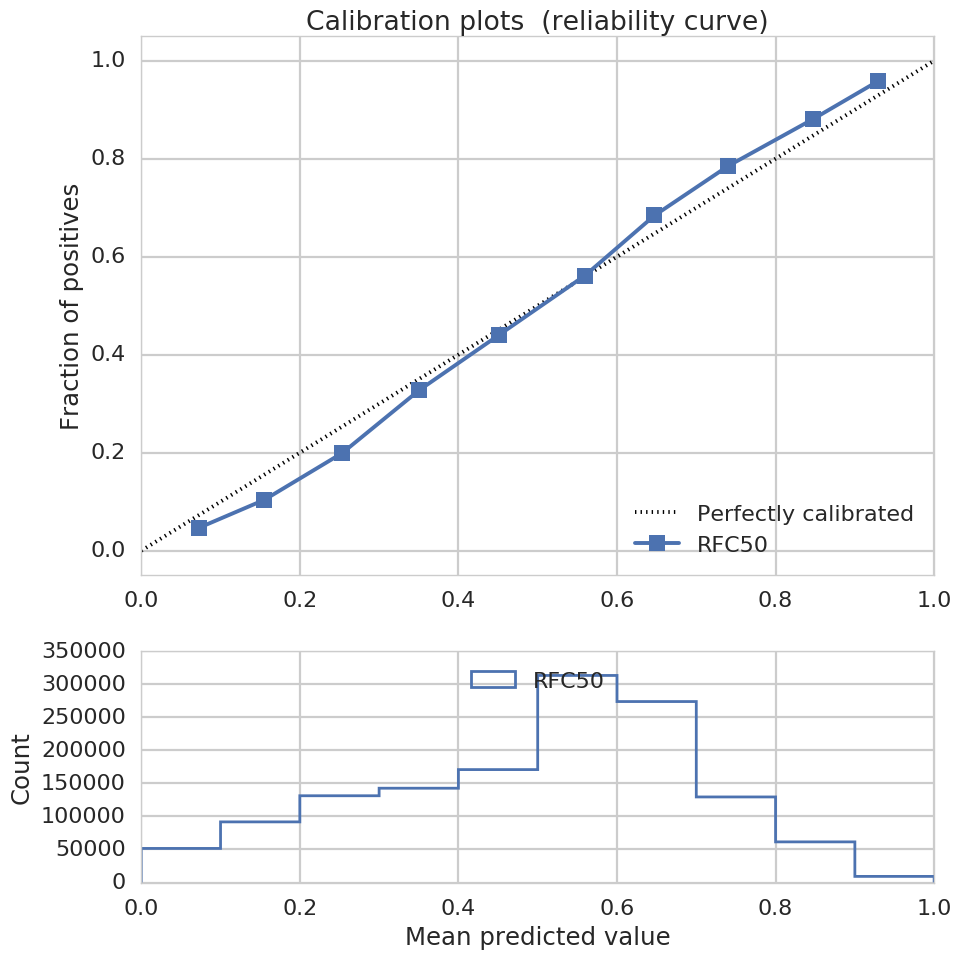

In [15]:
pu.calibration_plot([(clf_rfc_50, 'RFC50')], X50, y50)

## RFC50 Feature Importances:

In [16]:
clf_rfc_50.feature_importances_

array([ 0.        ,  0.01111992,  0.01738841,  0.09691916,  0.08738399,
        0.04054367,  0.07020832,  0.03947884,  0.05462069,  0.0195703 ,
        0.05671768,  0.05611883,  0.01111614,  0.02457952,  0.07627469,
        0.0286369 ,  0.04700204,  0.05679609,  0.03451965,  0.04139404,
        0.04609788,  0.08351324])

## TEST Data With RFC50 Classifier:

In [17]:
test_df = pu.test_data()

In [18]:
X = test_df[pu.x_columns].values
print(X.shape)
X.nbytes / 1024 /1024

(4577464, 22)


768.3121337890625

In [19]:
XTEST = test_df[pu.x_columns].values
yTEST = clf_rfc_50.predict(XTEST)

### TEST DATA CTR:

In [20]:
print("TEST CTR: {:.2f}%".format(pu.calculate_test_ctr(test_df, yTEST)))

TEST CTR: 35.01%


### TEST DATA Projection:

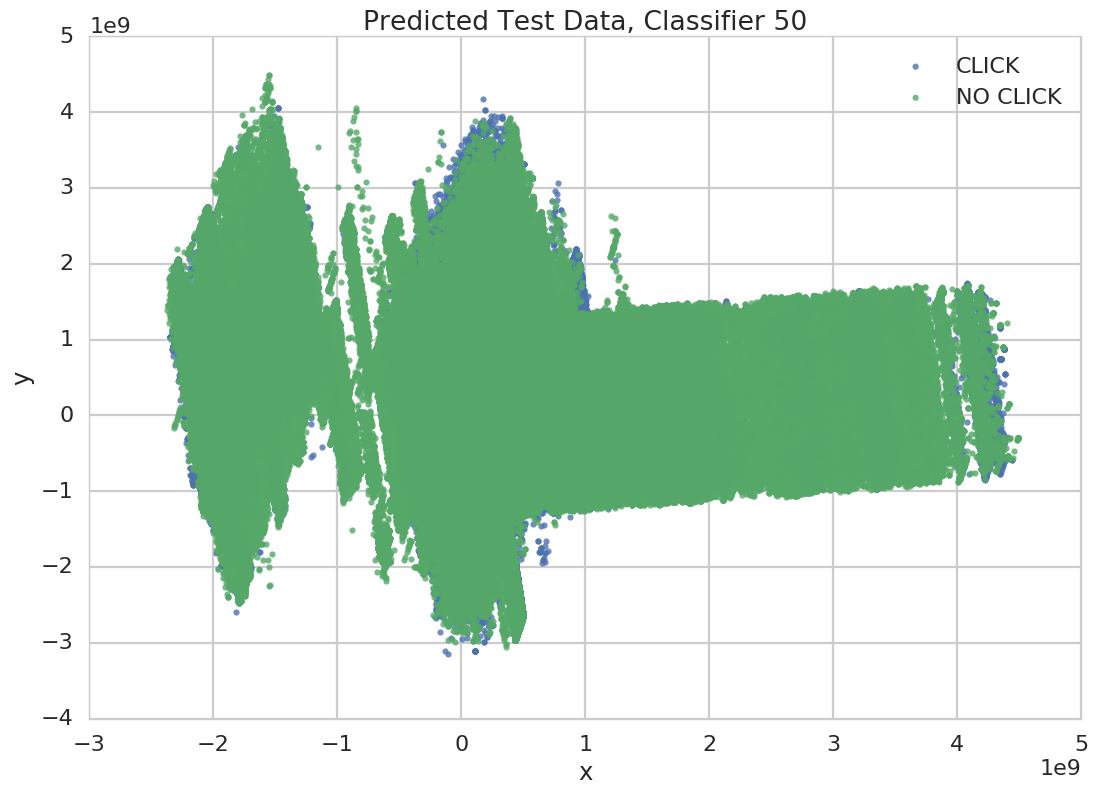

In [21]:
pu.plot_distribution(XTEST, None, clf_rfc_50, predicted=True, title="Predicted Test Data, Classifier 50")

### TEST DATA Calibration Curve:

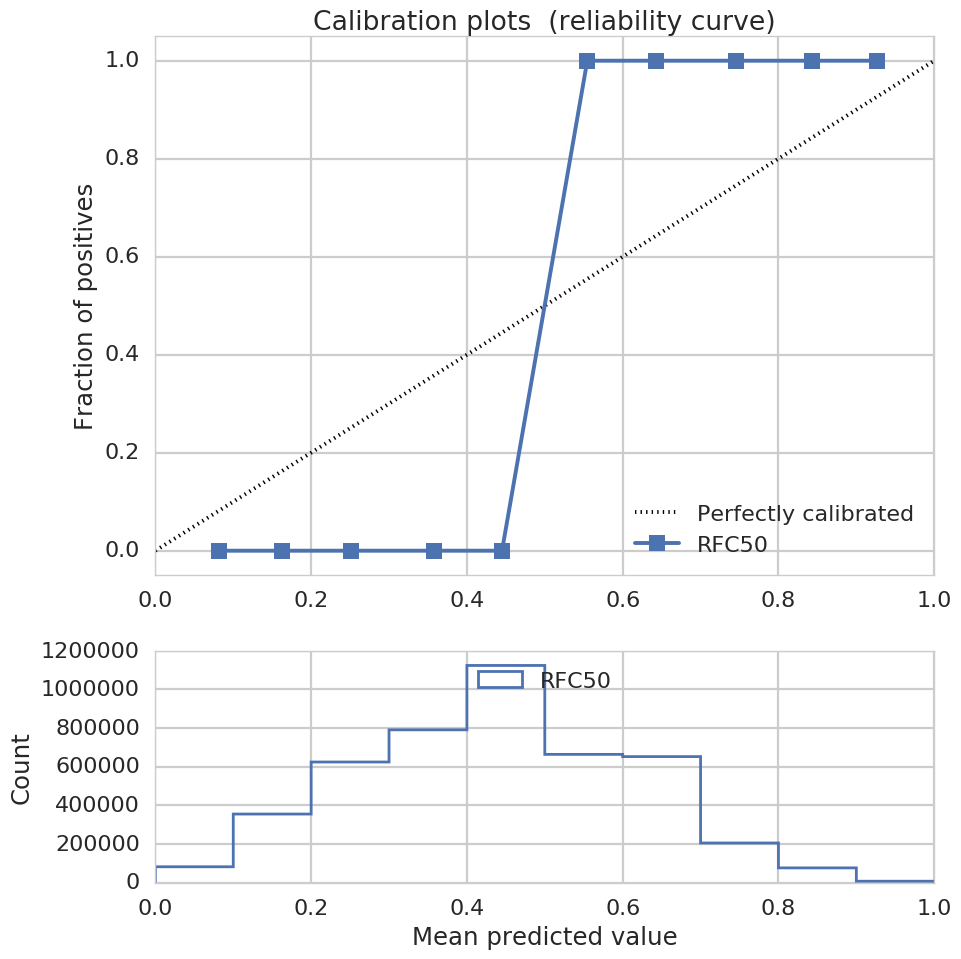

In [22]:
pu.calibration_plot([(clf_rfc_50, 'RFC50')], XTEST, yTEST)